In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('gold.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   int64  
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 107.5 KB


In [9]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,733043,1447.160034,84.860001,78.470001,15.180,1.471692
1,733044,1447.160034,85.570000,78.370003,15.285,1.474491
2,733045,1411.630005,85.129997,77.309998,15.167,1.475492
3,733048,1416.180054,84.769997,75.500000,15.053,1.468299
4,733049,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
X = df.drop('EUR/USD', axis = 1)

In [11]:
y = df['EUR/USD']

In [12]:
X.head()

,Date,SPX,GLD,USO,SLV
0,733043,1447.160034,84.860001,78.470001,15.180
1,733044,1447.160034,85.570000,78.370003,15.285
2,733045,1411.630005,85.129997,77.309998,15.167
3,733048,1416.180054,84.769997,75.500000,15.053
4,733049,1390.189941,86.779999,76.059998,15.590


In [13]:
correlation = df.corr()

In [14]:
correlation

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,0.944033,0.209118,-0.782230,-0.174108,-0.794540
SPX,0.944033,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.209118,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.782230,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.174108,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.794540,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

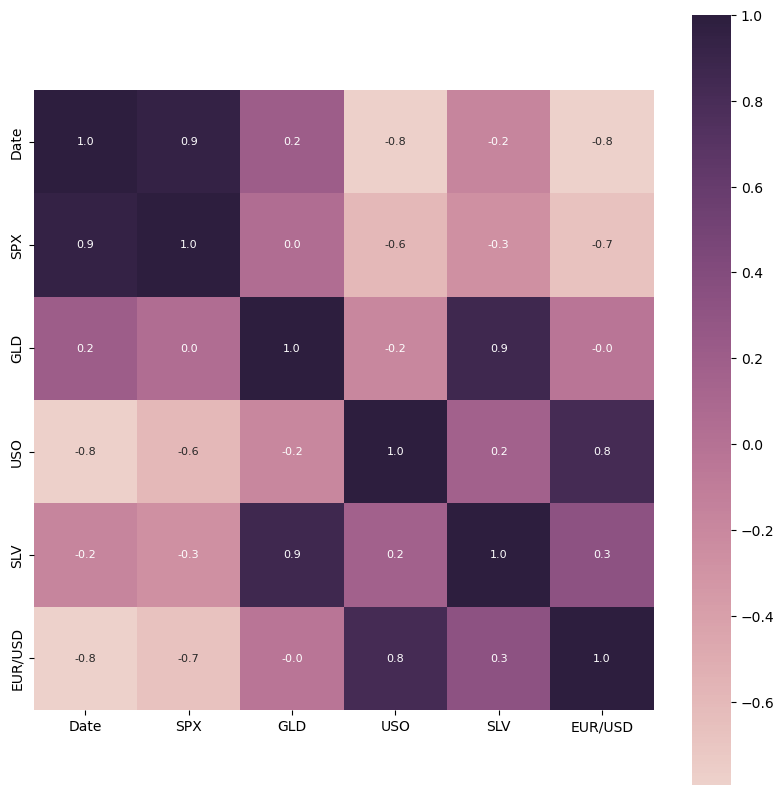

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square = True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap=sns.cubehelix_palette(as_cmap=True))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [17]:
X_train.head()

,Date,SPX,GLD,USO,SLV
1018,734737,1413.489990,160.539993,36.220001,28.920000
1870,736137,2085.449951,120.900002,11.740000,16.420000
118,733239,1245.359985,94.440002,109.250000,18.545000
220,733427,805.219971,84.519997,28.660000,11.090000
2053,736432,2328.949951,122.599998,11.130000,17.530001


In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
train_prediction = model.predict(X_train)

In [21]:
metrics.r2_score(train_prediction, y_train)

0.7263274533468305

In [22]:
test_prediction = model.predict(X_test)

In [23]:
metrics.r2_score(test_prediction, y_test)

0.6838547943768905